🔍 Detecting project structure...
✅ Found valid path: .
   Found data files: ['heart.csv', 'diabetes_prediction_dataset.csv']
📁 Setting working directory to: .

ATTEMPTING TO LOAD DATA FILES
✅ Heart data loaded from: heart.csv
✅ Diabetes data loaded from: diabetes_prediction_dataset.csv

DATA ANALYSIS

HEART DISEASE DATA ANALYSIS
Shape: (1025, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang

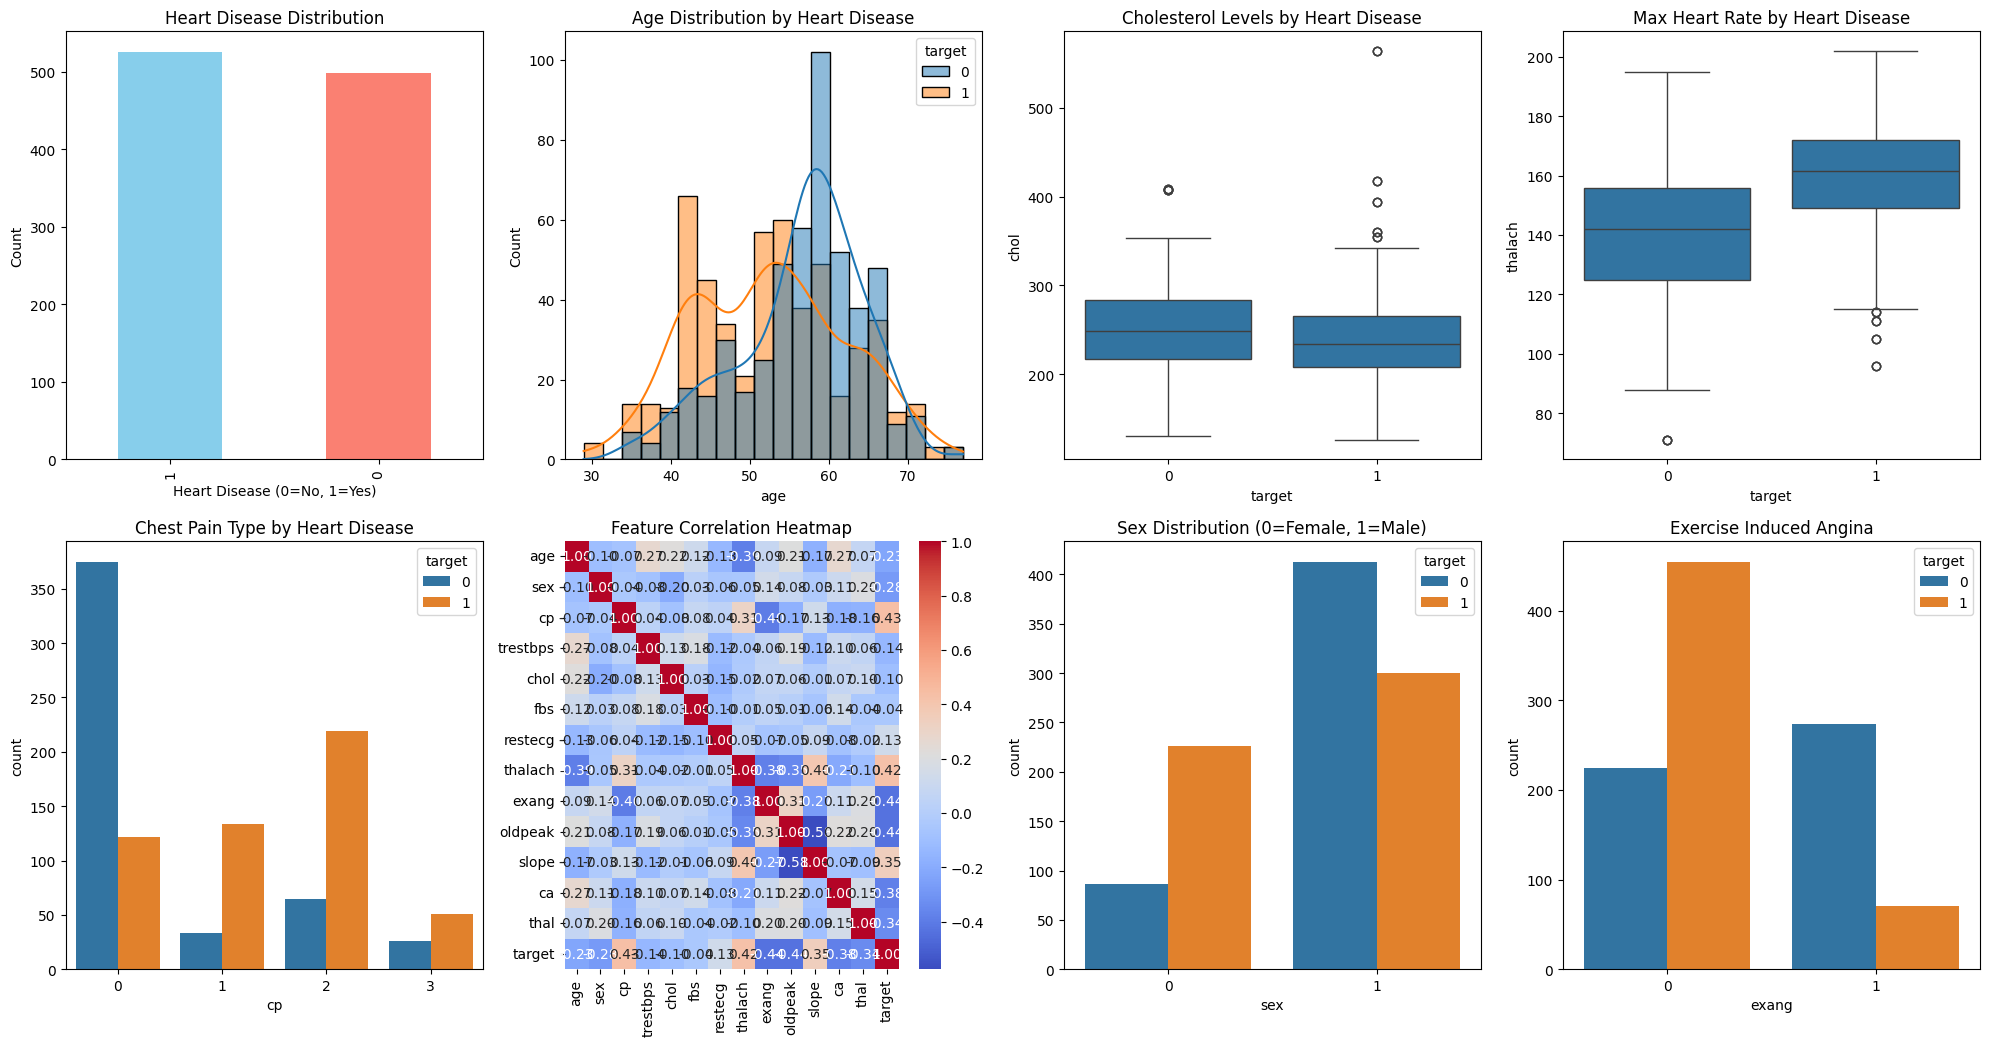


📈 CREATING DIABETES VISUALIZATIONS


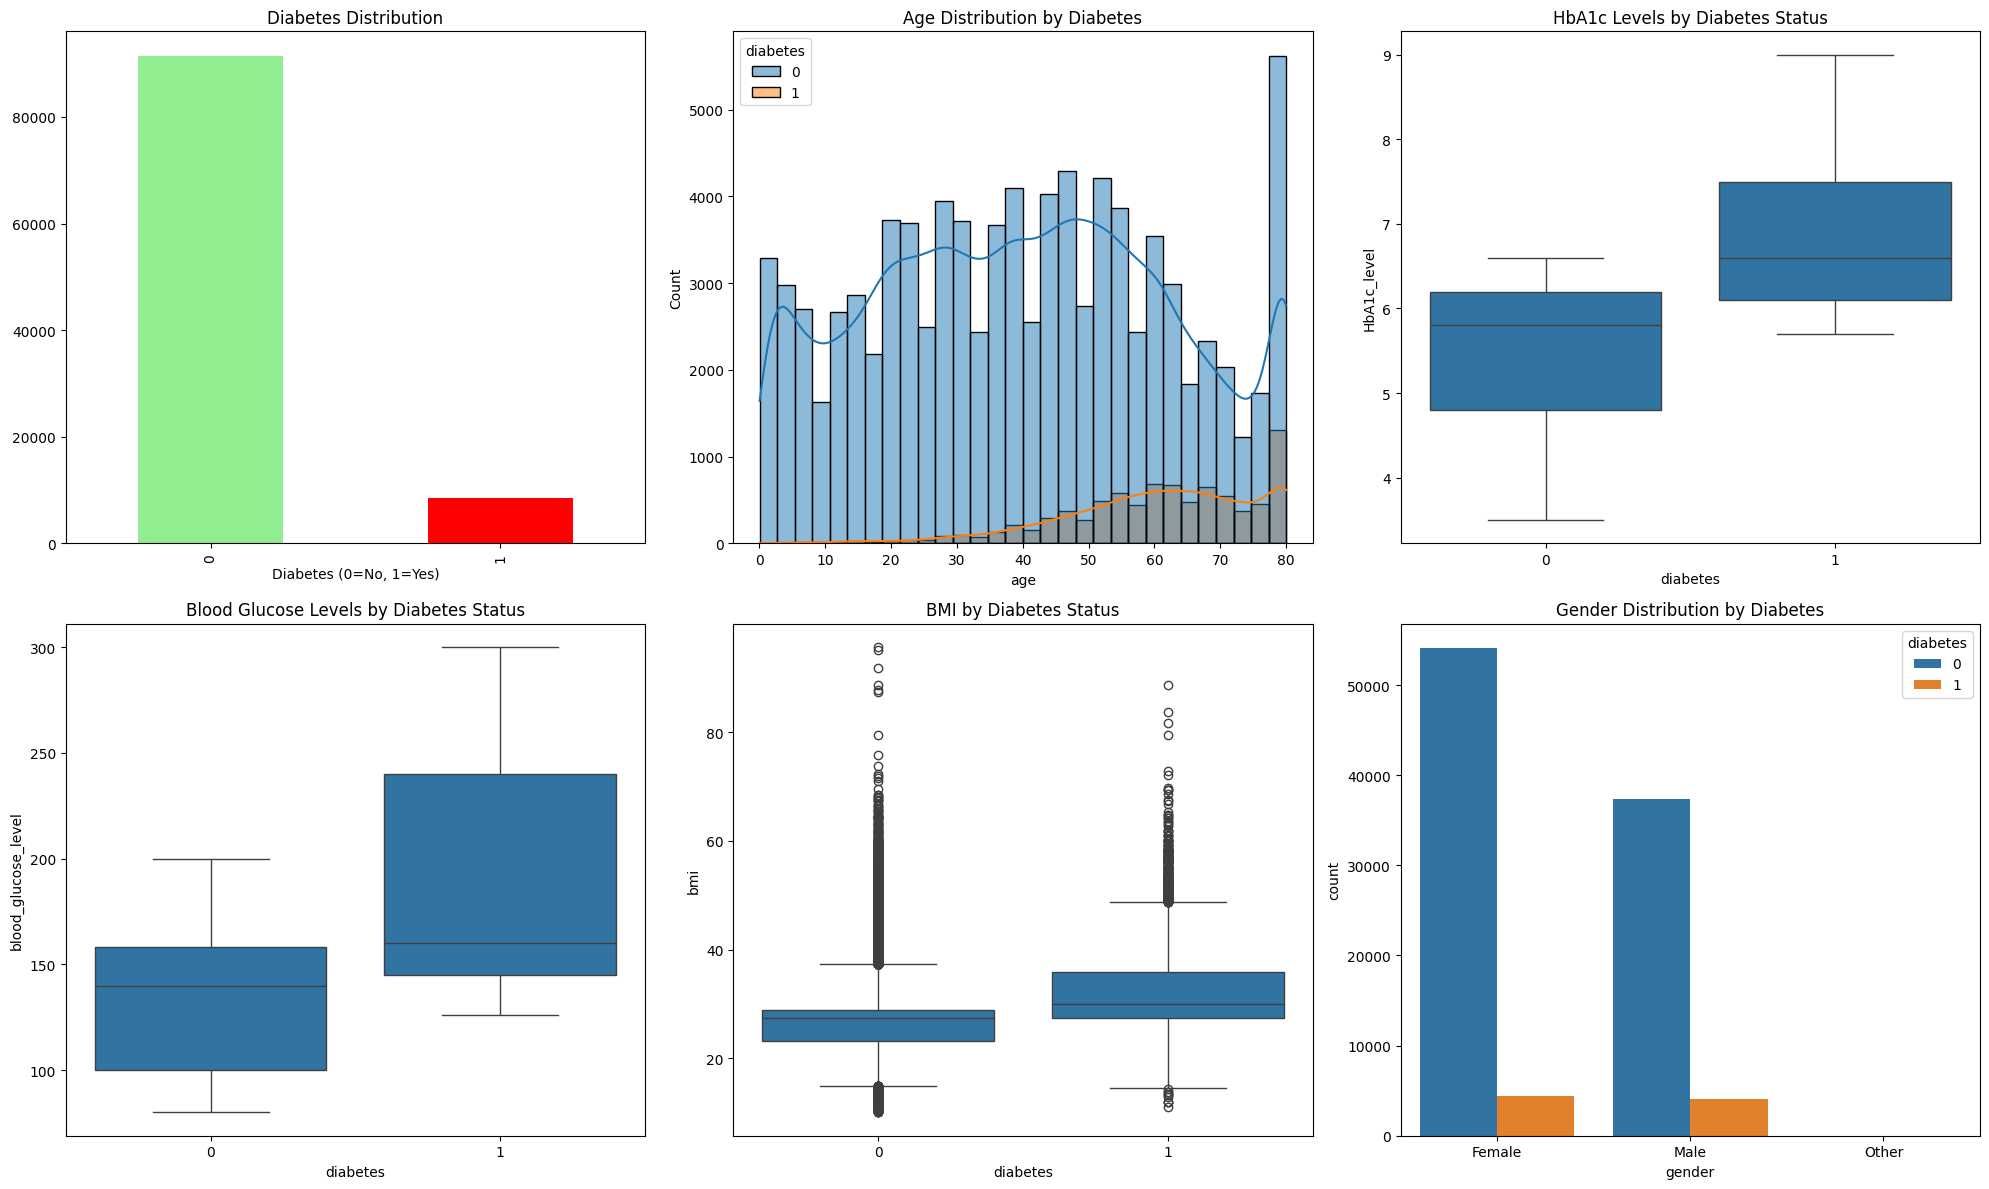

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

print("🔍 Detecting project structure...")

# Method 1: Try to find the project root automatically
def find_project_root():
    """Try to find the project root directory"""
    possible_paths = [
        '.',  # Current directory
        '..',  # Parent directory
        '../..',  # Two levels up
        'C:/Users/lcey_m_a/Documents/lcey/lcey/School/Python/Disease-Prediction-Diagnosis-using-Machine-Learning',
        'C:/Users/lcey_m_a/Documents/lcey/lcey/School/Python/Disease-Prediction-Diagnosis-using-Machine-Learning/src'
    ]
    
    for path in possible_paths:
        if os.path.exists(path):
            print(f"✅ Found valid path: {path}")
            # Check if data files exist in this path
            heart_files = [f for f in os.listdir(path) if 'heart' in f.lower() and f.endswith(('.csv', '.xls', '.xlsx'))]
            diabetes_files = [f for f in os.listdir(path) if 'diabetes' in f.lower() and f.endswith(('.csv', '.xls', '.xlsx'))]
            
            if heart_files or diabetes_files:
                print(f"   Found data files: {heart_files + diabetes_files}")
                return path
            else:
                # Check in src subdirectory
                src_path = os.path.join(path, 'src')
                if os.path.exists(src_path):
                    heart_files_src = [f for f in os.listdir(src_path) if 'heart' in f.lower() and f.endswith(('.csv', '.xls', '.xlsx'))]
                    diabetes_files_src = [f for f in os.listdir(src_path) if 'diabetes' in f.lower() and f.endswith(('.csv', '.xls', '.xlsx'))]
                    if heart_files_src or diabetes_files_src:
                        print(f"   Found data files in src: {heart_files_src + diabetes_files_src}")
                        return src_path
    return None

# Find the correct project path
project_path = find_project_root()

if project_path is None:
    print("❌ Could not automatically find project path.")
    print("📁 Let's check what directories exist...")
    
    # Check current directory structure
    current_dir = os.getcwd()
    print(f"Current directory: {current_dir}")
    print("Files and folders in current directory:")
    for item in os.listdir('.'):
        print(f"  - {item}")
    
    # Try to go up one level and check
    if os.path.exists('..'):
        print("\nFiles and folders in parent directory:")
        for item in os.listdir('..'):
            print(f"  - {item}")
    
    print("\n🚨 Please update the path manually in the code.")
else:
    print(f"📁 Setting working directory to: {project_path}")
    os.chdir(project_path)

print("\n" + "="*60)
print("ATTEMPTING TO LOAD DATA FILES")
print("="*60)

# Function to load data with multiple attempts
def load_data_file(filename_patterns, data_type):
    """Try to load data file with multiple possible names and formats"""
    for pattern in filename_patterns:
        for ext in ['.csv', '.xls', '.xlsx']:
            filename = pattern + ext
            if os.path.exists(filename):
                try:
                    if ext == '.csv':
                        df = pd.read_csv(filename)
                    else:
                        df = pd.read_excel(filename)
                    print(f"✅ {data_type} data loaded from: {filename}")
                    return df
                except Exception as e:
                    print(f"❌ Error loading {filename}: {e}")
    
    # If exact matches fail, try partial matches
    all_files = os.listdir('.')
    for file in all_files:
        if any(pattern.replace('*', '') in file.lower() for pattern in filename_patterns):
            try:
                if file.endswith('.csv'):
                    df = pd.read_csv(file)
                elif file.endswith(('.xls', '.xlsx')):
                    df = pd.read_excel(file)
                else:
                    continue
                print(f"✅ {data_type} data loaded from: {file}")
                return df
            except Exception as e:
                print(f"❌ Error loading {file}: {e}")
    
    return None

# Try to load heart data
heart_patterns = ['heart', 'heart_disease', 'heart-disease']
heart_df = load_data_file(heart_patterns, 'Heart')

# Try to load diabetes data
diabetes_patterns = ['diabetes', 'diabetes_prediction_dataset', 'diabetes-prediction']
diabetes_df = load_data_file(diabetes_patterns, 'Diabetes')

# If still not found, show available files
if heart_df is None or diabetes_df is None:
    print("\n📁 Available data files in current directory:")
    data_files = [f for f in os.listdir('.') if f.endswith(('.csv', '.xls', '.xlsx'))]
    for file in data_files:
        print(f"  - {file}")
    
    if not data_files:
        print("  No data files found!")

print("\n" + "="*60)
print("DATA ANALYSIS")
print("="*60)

# Explore the data
if heart_df is not None:
    print("\n" + "="*50)
    print("HEART DISEASE DATA ANALYSIS")
    print("="*50)
    print(f"Shape: {heart_df.shape}")
    print(f"Columns: {heart_df.columns.tolist()}")
    print("\nData Info:")
    print(heart_df.info())
    print("\nBasic Statistics:")
    print(heart_df.describe())
    print("\nMissing Values:")
    print(heart_df.isnull().sum())
    print("\nTarget Distribution:")
    
    # Find target column
    target_columns = ['target', 'Target', 'TARGET', 'class', 'Class', 'CLASS', 'disease', 'Disease', 'result', 'Result']
    target_found = False
    for col in target_columns:
        if col in heart_df.columns:
            print(f"Target column: '{col}'")
            print(heart_df[col].value_counts())
            target_found = True
            break
    
    if not target_found:
        print("No standard target column found.")
        print("All columns:", heart_df.columns.tolist())
        print("\nFirst 3 rows:")
        print(heart_df.head(3))
else:
    print("❌ No heart data available for analysis")

if diabetes_df is not None:
    print("\n" + "="*50)
    print("DIABETES DATA ANALYSIS")
    print("="*50)
    print(f"Shape: {diabetes_df.shape}")
    print(f"Columns: {diabetes_df.columns.tolist()}")
    print("\nData Info:")
    print(diabetes_df.info())
    print("\nBasic Statistics:")
    print(diabetes_df.describe())
    print("\nMissing Values:")
    print(diabetes_df.isnull().sum())
    print("\nTarget Distribution:")
    
    # Find target column
    target_columns = ['Outcome', 'Diabetes', 'diabetes', 'target', 'Target', 'class', 'Class', 'result', 'Result']
    target_found = False
    for col in target_columns:
        if col in diabetes_df.columns:
            print(f"Target column: '{col}'")
            print(diabetes_df[col].value_counts())
            target_found = True
            break
    
    if not target_found:
        print("No standard target column found.")
        print("All columns:", diabetes_df.columns.tolist())
        print("\nFirst 3 rows:")
        print(diabetes_df.head(3))
else:
    print("❌ No diabetes data available for analysis")

# Save data to standardized location if loaded successfully
if heart_df is not None:
    os.makedirs('../data/raw', exist_ok=True)
    heart_df.to_csv('../data/raw/heart.csv', index=False)
    print("\n💾 Heart data saved to '../data/raw/heart.csv'")

if diabetes_df is not None:
    diabetes_df.to_csv('../data/raw/diabetes.csv', index=False)
    print("💾 Diabetes data saved to '../data/raw/diabetes.csv'")

    # Enhanced Visualizations for Heart Disease
print("📈 CREATING HEART DISEASE VISUALIZATIONS")

plt.figure(figsize=(20, 15))

# 1. Target Distribution
plt.subplot(3, 4, 1)
heart_df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')

# 2. Age Distribution by Target
plt.subplot(3, 4, 2)
sns.histplot(data=heart_df, x='age', hue='target', bins=20, kde=True)
plt.title('Age Distribution by Heart Disease')

# 3. Cholesterol vs Heart Disease
plt.subplot(3, 4, 3)
sns.boxplot(data=heart_df, x='target', y='chol')
plt.title('Cholesterol Levels by Heart Disease')

# 4. Maximum Heart Rate by Target
plt.subplot(3, 4, 4)
sns.boxplot(data=heart_df, x='target', y='thalach')
plt.title('Max Heart Rate by Heart Disease')

# 5. Chest Pain Type Distribution
plt.subplot(3, 4, 5)
sns.countplot(data=heart_df, x='cp', hue='target')
plt.title('Chest Pain Type by Heart Disease')

# 6. Correlation Heatmap
plt.subplot(3, 4, 6)
correlation = heart_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')

# 7. Sex Distribution
plt.subplot(3, 4, 7)
sns.countplot(data=heart_df, x='sex', hue='target')
plt.title('Sex Distribution (0=Female, 1=Male)')

# 8. Exercise Induced Angina
plt.subplot(3, 4, 8)
sns.countplot(data=heart_df, x='exang', hue='target')
plt.title('Exercise Induced Angina')

plt.tight_layout()
plt.show()

# Diabetes Data Visualizations
print("\n📈 CREATING DIABETES VISUALIZATIONS")

plt.figure(figsize=(20, 12))

# 1. Diabetes Distribution
plt.subplot(2, 3, 1)
diabetes_df['diabetes'].value_counts().plot(kind='bar', color=['lightgreen', 'red'])
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes (0=No, 1=Yes)')

# 2. Age Distribution
plt.subplot(2, 3, 2)
sns.histplot(data=diabetes_df, x='age', hue='diabetes', bins=30, kde=True)
plt.title('Age Distribution by Diabetes')

# 3. HbA1c Levels
plt.subplot(2, 3, 3)
sns.boxplot(data=diabetes_df, x='diabetes', y='HbA1c_level')
plt.title('HbA1c Levels by Diabetes Status')

# 4. Blood Glucose Levels
plt.subplot(2, 3, 4)
sns.boxplot(data=diabetes_df, x='diabetes', y='blood_glucose_level')
plt.title('Blood Glucose Levels by Diabetes Status')

# 5. BMI Distribution
plt.subplot(2, 3, 5)
sns.boxplot(data=diabetes_df, x='diabetes', y='bmi')
plt.title('BMI by Diabetes Status')

# 6. Gender Distribution
plt.subplot(2, 3, 6)
sns.countplot(data=diabetes_df, x='gender', hue='diabetes')
plt.title('Gender Distribution by Diabetes')

plt.tight_layout()
plt.show()